<h1 style="text-align:center; font-size:300%; color:#00008B;"><b>Credit Risk Prediction Analysis</b></h1>

## Credit Risk Analysis Project Overview
In this project on credit risk analysis, multiple machine learning models were applied to predict the likelihood of credit risk based on various factors. The models used include Logistic Regression, Logistic Regression with SGD, Random Forest, and Random Forest with Tuned Parameters. The goal was to evaluate the effectiveness of these models in identifying high-risk clients.

## Dataset Description:
#### Unnamed: 0: An identifier or index column.
#### Age: Age of the applicant (numeric).
#### Sex: Gender of the applicant (categorical).
#### Housing: Housing loan status (categorical).
#### Saving accounts: Status of savings account (categorical, with missing values).
#### Checking account: Status of checking account (categorical, with missing values).
#### Credit amount: Amount of credit requested (numeric).
#### Duration: Duration of the credit in months (numeric).
#### Purpose: Purpose of the credit (categorical).
#### Risk: Credit risk classification (categorical, target variable).

<h2 style="font-size:150%;"><b>Importing Libraries:</b></h2>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline
import matplotlib
sns.set_style('ticks')
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')   # Supressing the warning messages

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [36]:
plt.rcParams['figure.figsize'] = [15,8]

<h2 style="font-size:150%;"><b>Setting options:</b></h2>

In [37]:
pd.options.display.max_columns = None   # displaying all columns
pd.options.display.max_rows = None      # displaying all rows 
np.set_printoptions(suppress=True)      #converting the 'exponential' values to float

<h2 style="font-size:150%;"><b>Reading Data:</b></h2>

In [17]:
df=pd.read_csv(r"C:\Users\sm983\Desktop\Imarticus full clear\Github\credit_risk_analysis\Data\german_credit_data.csv")
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


<h2 style="font-size:150%;"><b>Checking Shape of Data:</b></h2>

In [18]:
df.shape

(1000, 11)

<h2 style="font-size:150%;"><b>Data Overview:</b></h2>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


<h2 style="font-size:150%;"><b>Checking Data Types of Variables:</b></h2>

In [20]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

<h2 style="font-size:150%;"><b>Summary Statistics:</b></h2>

In [21]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


<h2 style="font-size:150%;"><b>Checking for Duplicates:</b></h2>

In [22]:
# Check for duplicates if any
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

<h2 style="font-size:150%;"><b>Checking for Null Values:</b></h2>

In [23]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

<h2 style="font-size:150%;"><b>Treating Null Values:</b></h2>

In [25]:
# Replace missing values in 'Saving accounts' with the most frequent value (mode)
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)

# Replace missing values in 'Checking account' with the most frequent value (mode)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)

df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

<h2 style="font-size:150%;"><b>Finding Unique Values:</b></h2>

In [26]:
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

<h2 style="font-size:150%;"><b>Checking Distribution of Target Variable:</b></h2>

In [28]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

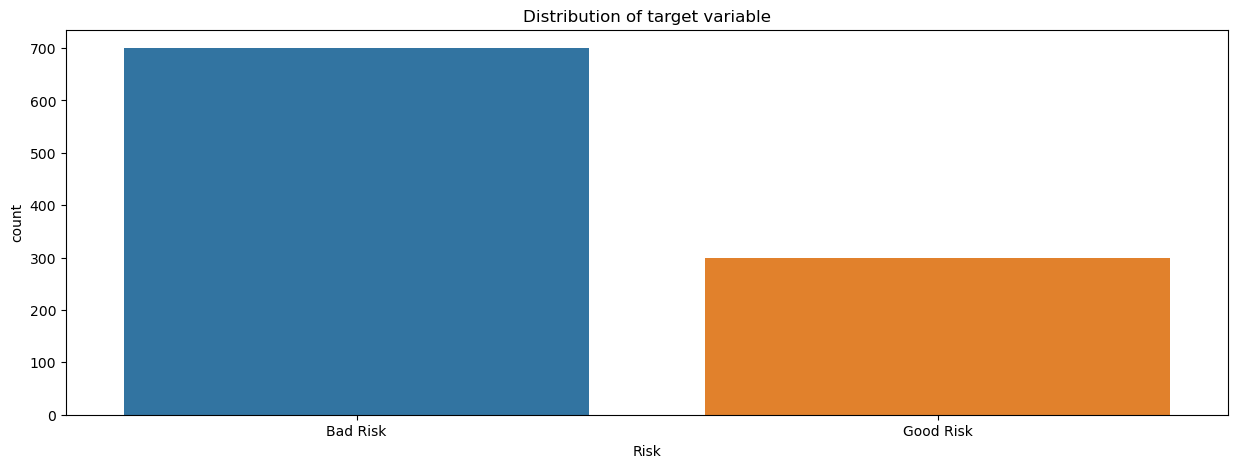

In [29]:
x_labels= ['Bad Risk', 'Good Risk']
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='Risk', data=df)
ax.set_xticklabels(x_labels)
plt.title('Distribution of target variable')
plt.show()

<h2 style="font-size:200%;"><b>Exploratory Data Analysis:</b></h2>

<h2 style="font-size:100%;"><b>Gender Distribution of the Dataset:</b></h2>

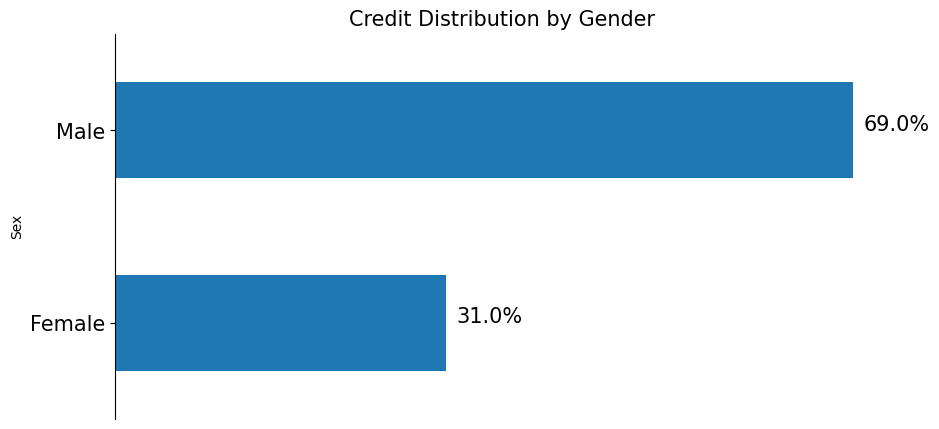

In [30]:
f, ax = plt.subplots()
ax = df.Sex.value_counts().plot(kind='barh',figsize = (10,5))
kwarg ={'fontsize':15,'color':'black'}
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.25,
           str((i.get_width()/len(df.Sex))*100)+'%',**kwarg)
ax.invert_yaxis()  
ax.set_yticklabels(['Male','Female'],**kwarg)
x_axis = ax.axes.get_xaxis().set_visible(False) # turn off the x axis label
ax.set_title('Credit Distribution by Gender',**kwarg)
sns.despine(bottom=True)
plt.show()

<h2 style="font-size:100%;"><b>Categozising the Age distribution by Age Generation:</b></h2>

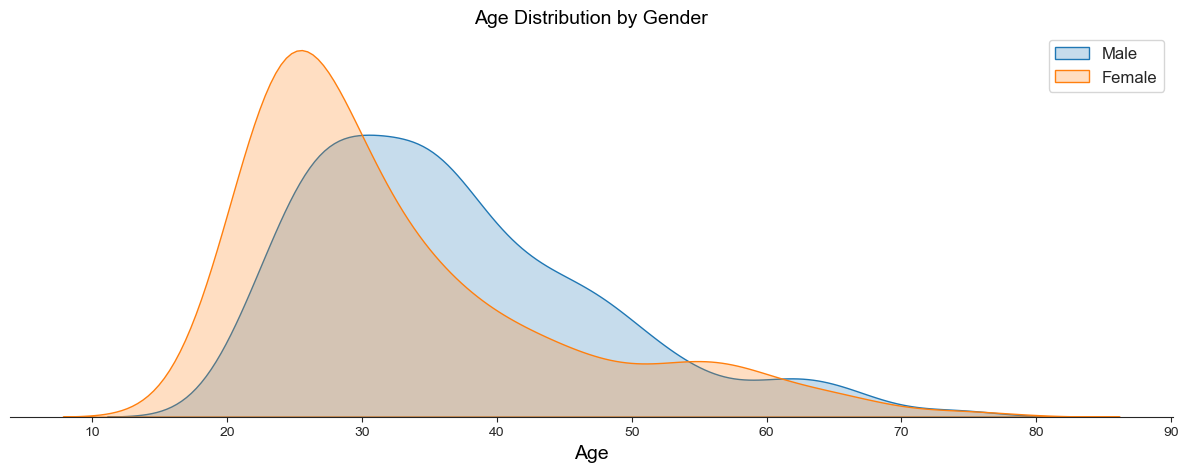

In [39]:
range_list = (18,35,45,65,80)
cat = ['Millennials','Gen_X','Baby_Boomer','Silent_Gen']
df['Age_Gen'] = pd.cut(df.Age,range_list,labels=cat)

### Categoze the Duration by Years

range_list = (1,12,24,36,48,60,72)
cat = ['One','Two','Three','Four','Five','Six']
df['Duration_yrs']= pd.cut(df.Duration,range_list,labels=cat)

## 4. Gender Distribution by Age

f, ax = plt.subplots(figsize = (15,5))
ax = sns.kdeplot(male_data.Age,shade=True)
ax = sns.kdeplot(female_data.Age,shade=True)
ax.legend(['Male','Female'],fontsize=12)
ax.set_xlabel('Age',fontsize=14,color='black')
ax.set_title('Age Distribution by Gender',color='black',fontsize=14)
y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
sns.despine(left=True)

<h2 style="font-size:100%;"><b>Gender Distribution of Job by Skill Set:</b></h2>

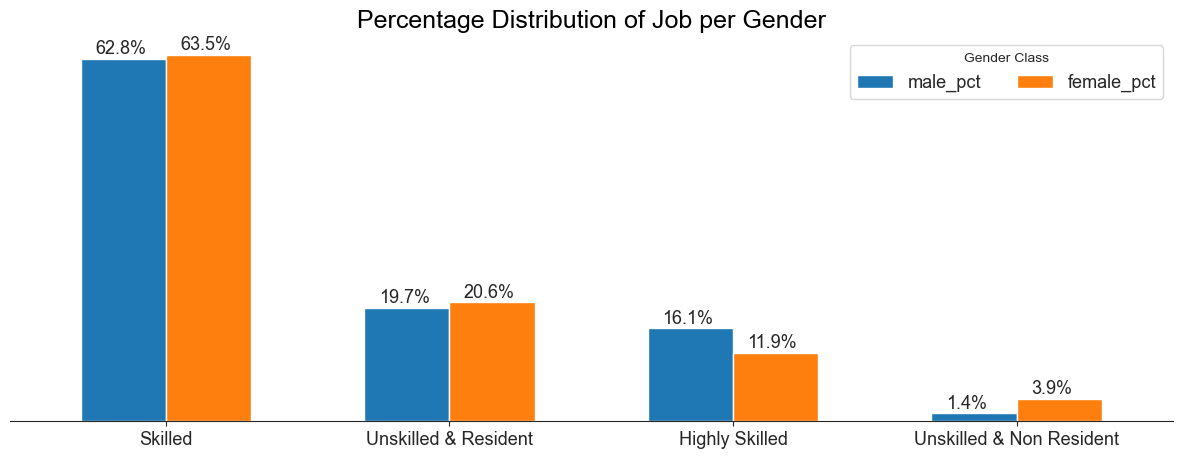

In [40]:
# DataFrame by Job percentage
female_job_pct = pd.DataFrame(round(female_data.Job.value_counts()/len(female_data.Job)*100,1)).reset_index()
female_job_pct.columns = ['Job','female_pct']
# Male DataFrame for the Job percentage
male_job_pct = pd.DataFrame(round(male_data.Job.value_counts()/len(male_data.Job)*100,1)).reset_index()
male_job_pct.columns = ['Job','male_pct']
# Joining the DataFrame together
job_pct = pd.merge(female_job_pct,male_job_pct,how='left')
job_pct.Job = job_pct['Job'].map({0:'Unskilled & Non Resident',1:'Unskilled & Resident',2:'Skilled',3:'Highly Skilled'})

ax = job_pct[['male_pct','female_pct']].plot(kind='bar',figsize=(15,5),fontsize=13,width=0.6)
ax.set_xticklabels(job_pct.Job.tolist(),rotation=0)
ax.set_title('Percentage Distribution of Job per Gender',fontsize=18,color='black')
for i in ax.patches:
    ax.text(i.get_x()+0.05, i.get_height()+0.8, str((i.get_height()))+'%', fontsize=13)
y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
plt.legend(loc=('upper right'),fontsize=13,title ='Gender Class',ncol=2)
sns.despine(left=True)


<h2 style="font-size:100%;"><b>Female Risk Evaluation:</b></h2>

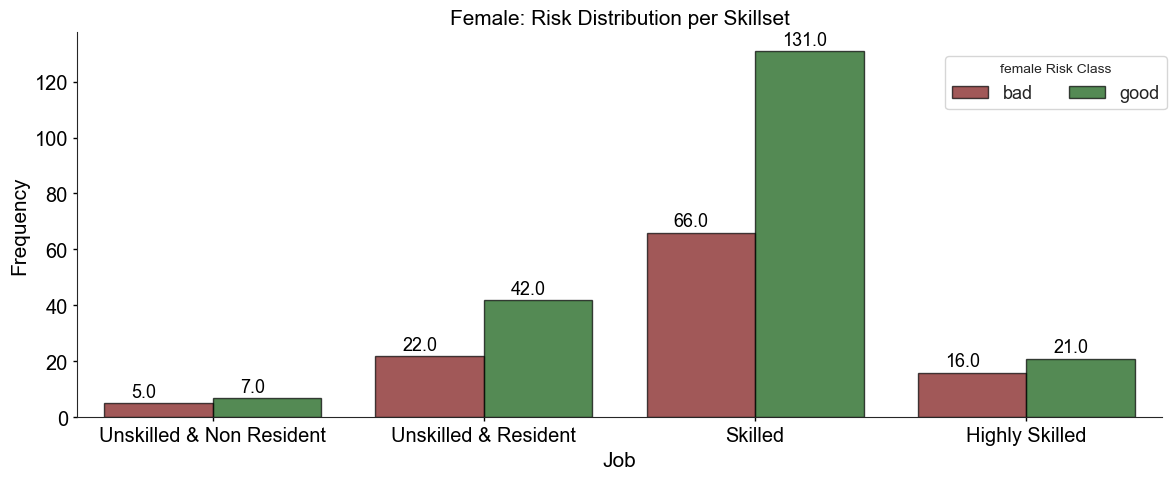

In [41]:
# Create a dataframe of only Sex, Duration_yrs and risk
df_duration_yrs = df.groupby(['Sex','Duration_yrs','Risk']).size().reset_index()
df_duration_yrs.columns = ['Sex','Duration_yrs','Risk','count']
# Split the New dataset df_duration_yrs by Gender
ms = df_duration_yrs[df_duration_yrs['Sex']=='male']
fs = df_duration_yrs[df_duration_yrs['Sex']=='female']
### 6.1 By Skill Set

female_risk = female_data.groupby(['Risk','Job']).size().reset_index()
female_risk.columns = ['Risk','Job','count']
female_risk.Job=female_risk.Job.map({0:'Unskilled & Non Resident',1:'Unskilled & Resident',2:'Skilled',3:'Highly Skilled'})
f, ax=plt.subplots(figsize=(14,5))
ax = sns.barplot(x='Job',y= 'count',data=female_risk,hue='Risk',palette=['darkred', 'darkgreen'],alpha=0.7,
                edgecolor="black")
kwarg ={'fontsize':15, 'color':'black'}
ax.set_title('Female: Risk Distribution per Skillset',**kwarg)
ax.tick_params(length=3, width=1, colors='black',labelsize='x-large')
ax.set_xlabel('Job',**kwarg)
ax.set_ylabel('Frequency',**kwarg)
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+2.2, str((i.get_height())), fontsize=13,color='black')
plt.legend(loc=(0.8,0.8),fontsize=13,title ='female Risk Class',ncol=2)
sns.despine()

<h2 style="font-size:100%;"><b> By Duration in Years:</b></h2>

In [42]:
trace1 = go.Bar(
    x=fs[fs['Risk']=='bad']['Duration_yrs'].values,
    y= fs[fs['Risk']=='bad']['count'].values,
    text =  fs[fs['Risk']=='bad']['count'].values,
    textposition='auto',
    textfont=dict(
        family='sans serif',
        size=18,
        color='#FFFAFA'),
    marker=dict(
    color='rgb(139,0,0)'),
    opacity=0.8,
    name = 'Bad Risk'
)
trace2 = go.Bar(
    x=fs[fs['Risk']=='good']['Duration_yrs'].values,
    y= fs[fs['Risk']=='good']['count'].values,
    text =  fs[fs['Risk']=='good']['count'].values,
    textposition='auto',
    textfont=dict(
        family='sans serif',
        size=18,
        color='#FFFAFA'),
    marker=dict(
    color='rgb(0,100,0)'),
    opacity=0.8,
    name = 'Good Risk'
)
data = [trace1, trace2]
layout = go.Layout (
    yaxis = dict(
    title = 'Frequency'),
    
    xaxis = dict (
    title = 'Duration in Years'),
    
    title = 'Female: Risk Distribution per Duration'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


<h2 style="font-size:100%;"><b>Male Risk Evaluation:</b></h2>

<h2 style="font-size:100%;"><b>Male Risk Evaluation-By Skill Set:</b></h2>

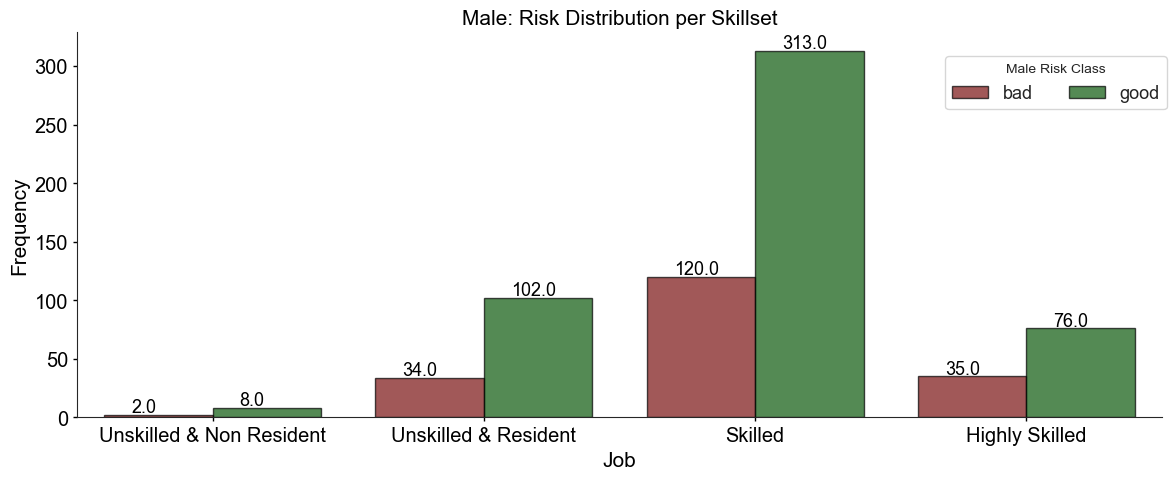

In [43]:
male_risk = male_data.groupby(['Risk','Job']).size().reset_index()
male_risk.columns = ['Risk','Job','count']
male_risk.Job= male_risk.Job.map({0:'Unskilled & Non Resident',1:'Unskilled & Resident',2:'Skilled',3:'Highly Skilled'})

f, ax=plt.subplots(figsize=(14,5))
ax = sns.barplot(x='Job',y= 'count',data= male_risk,hue='Risk',palette=['darkred', 'darkgreen'],alpha=0.7,
                edgecolor="black")
kwarg ={'fontsize':15, 'color':'black'}
ax.set_title('Male: Risk Distribution per Skillset',**kwarg)
ax.tick_params(length=3, width=1, colors='black',labelsize='x-large')
ax.set_xlabel('Job',**kwarg)
ax.set_ylabel('Frequency',**kwarg)
for i in ax.patches:
     ax.text(i.get_x()+0.1, i.get_height()+2.2, str((i.get_height())), fontsize=13,color='black')
#y_axis = ax.axes.get_yaxis().set_visible(False) # turn off the y axis label
plt.legend(loc=(0.8,0.8),fontsize=13,title ='Male Risk Class',ncol=2)
sns.despine()

<h2 style="font-size:100%;"><b>Male Risk Evaluation-By Duration in Years:</b></h2>

In [44]:
trace1 = go.Bar(
    x=ms[ms['Risk']=='bad']['Duration_yrs'].values,
    y= ms[ms['Risk']=='bad']['count'].values,
    text =  ms[ms['Risk']=='bad']['count'].values,
    textposition='auto',
    textfont=dict(
        family='sans serif',
        size=18,
        color='#FFFAFA'),
    marker=dict(
    color='rgb(139,0,0)'),
    opacity=0.8,
    name = 'Bad Risk'
)
trace2 = go.Bar(
    x=ms[ms['Risk']=='good']['Duration_yrs'].values,
    y= ms[ms['Risk']=='good']['count'].values,
    text =  ms[ms['Risk']=='good']['count'].values,
    textposition='auto',
    textfont=dict(
        family='sans serif',
        size=18,
        color='#FFFAFA'),
    marker=dict(
    color='rgb(0,100,0)'),
    opacity=0.8,
    name = 'Good Risk'
    )
data = [trace1, trace2]

layout = go.Layout (
    yaxis = dict(
    title = 'Frequency'),
    
    xaxis = dict (
    title = 'Duration in Years'),
    
    title = 'Male: Risk Distribution per Duration'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)

<h2 style="font-size:100%;"><b>Male Reason for Credit:</b></h2>

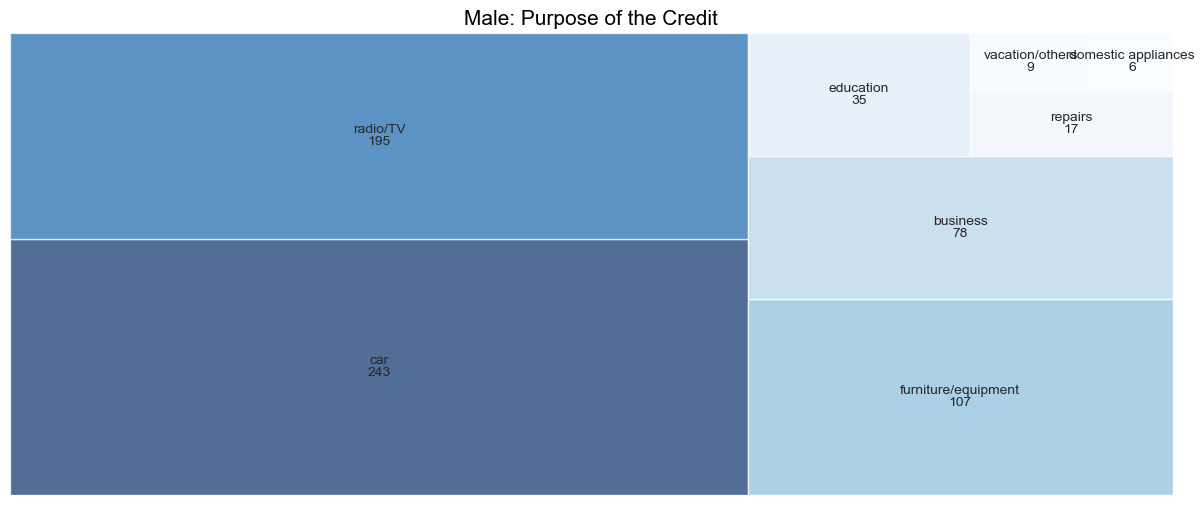

In [46]:
count = male_data.Purpose.value_counts().values
label = male_data.Purpose.value_counts().index
#color= ['darkred','tan','c','lightcoral','skyblue','w','silver','silver']
norm = matplotlib.colors.Normalize(vmin=min(count), vmax=max(count))
colors = [matplotlib.cm.Blues(norm(value)) for value in count]
#Plot the Treemap
f, ax = plt.subplots(figsize=(15,6))
ax = squarify.plot(sizes = count,label=label,color=colors,alpha=0.7,value=count)
plt.axis('off')
ax.set_title('Male: Purpose of the Credit',color='black', size=15)
plt.show()

<h2 style="font-size:100%;"><b>Female Reason for Credit:</b></h2>

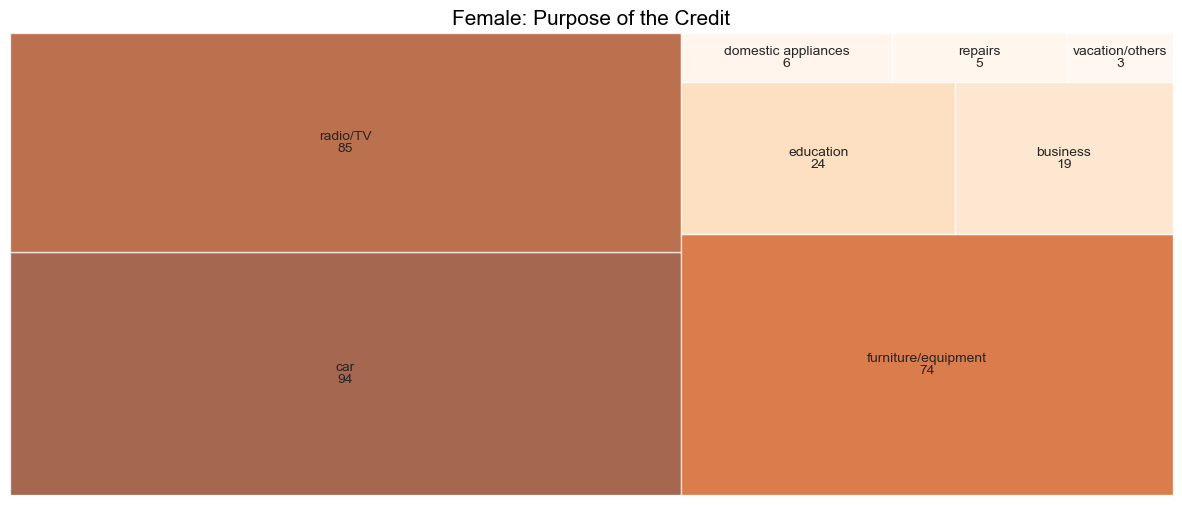

In [47]:
count = female_data.Purpose.value_counts().values
label = female_data.Purpose.value_counts().index
#color= ['darkred','tan','c','lightcoral','skyblue','w','silver','silver']
norm = matplotlib.colors.Normalize(vmin=min(count), vmax=max(count))
colors = [matplotlib.cm.Oranges(norm(value)) for value in count]
#Plot the Treemap
f, ax = plt.subplots(figsize=(15,6))
ax = squarify.plot(sizes = count,label=label,color=colors,alpha=0.7,value=count)
plt.axis('off')
ax.set_title('Female: Purpose of the Credit',color='black', size=15)
plt.show()


In [50]:
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Gen,Duration_yrs
0,0,67,male,2,own,little,little,1169,6,radio/TV,good,Silent_Gen,One
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Millennials,Four
2,2,49,male,1,own,little,little,2096,12,education,good,Baby_Boomer,One
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Gen_X,Four
4,4,53,male,2,free,little,little,4870,24,car,bad,Baby_Boomer,Two


<h2 style="font-size:150%;"><b>Label_Encoding:</b></h2>

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame setup (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv') # Use this line if you need to read the DataFrame from a CSV file

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns based on your description
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk','Age_Gen','Duration_yrs']

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Display the DataFrame to check the result
print(df.head())


   Unnamed: 0  Age  Sex  Job  Housing  Saving accounts  Checking account  \
0           0   67    1    2        1                0                 0   
1           1   22    0    2        1                0                 1   
2           2   49    1    1        1                0                 0   
3           3   45    1    2        0                0                 0   
4           4   53    1    2        0                0                 0   

   Credit amount  Duration  Purpose  Risk  Age_Gen  Duration_yrs  
0           1169         6        5     1        3             2  
1           5951        48        5     0        2             1  
2           2096        12        3     1        0             2  
3           7882        42        4     1        1             1  
4           4870        24        1     0        0             5  


In [53]:
df.dtypes

Unnamed: 0          int64
Age                 int64
Sex                 int32
Job                 int64
Housing             int32
Saving accounts     int32
Checking account    int32
Credit amount       int64
Duration            int64
Purpose             int32
Risk                int32
Age_Gen             int32
Duration_yrs        int32
dtype: object

<h3 style="font-size:150%;"><b>Correlation Analysis :</b></h3>

<h3 style="font-size:100%;"><b>Correlation Matrix Using corr():</b></h3>

In [55]:
df.corr()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Gen,Duration_yrs
Unnamed: 0,1.000000,-0.010096,-0.001693,-0.027345,0.025452,-0.037965,-0.054275,0.013488,0.030788,-0.036897,-0.034606,0.000686,0.100338
Age,-0.010096,1.000000,0.161694,0.015673,-0.301419,0.015772,-0.027176,0.032716,-0.036136,-0.074084,0.091127,-0.697303,-0.076459
Sex,-0.001693,0.161694,1.000000,0.070298,-0.219844,-0.014425,-0.012705,0.093482,0.081432,-0.063231,0.075493,-0.136304,-0.029528
Job,-0.027345,0.015673,0.070298,1.000000,-0.107191,-0.034596,-0.043277,0.285385,0.210910,-0.025326,-0.032735,0.019004,0.068550
Housing,0.025452,-0.301419,-0.219844,-0.107191,1.000000,0.043324,-0.028196,-0.135632,-0.157049,0.020633,-0.019315,0.204778,0.045383
Saving accounts,-0.037965,0.015772,-0.014425,-0.034596,0.043324,1.000000,0.015763,-0.077929,-0.043274,-0.024817,0.102751,-0.014339,0.027096
Checking account,-0.054275,-0.027176,-0.012705,-0.043277,-0.028196,0.015763,1.000000,0.006953,0.004163,0.018577,-0.052375,0.050198,-0.055153
Credit amount,0.013488,0.032716,0.093482,0.285385,-0.135632,-0.077929,0.006953,1.000000,0.624984,-0.151720,-0.154739,-0.001101,-0.077449
Duration,0.030788,-0.036136,0.081432,0.210910,-0.157049,-0.043274,0.004163,0.624984,1.000000,-0.083459,-0.214927,-0.011671,0.000518
Purpose,-0.036897,-0.074084,-0.063231,-0.025326,0.020633,-0.024817,0.018577,-0.151720,-0.083459,1.000000,0.061145,0.020317,-0.000616


<h3 style="font-size:100%;"><b>Correlation Visualization with Heatmap:</b></h3>

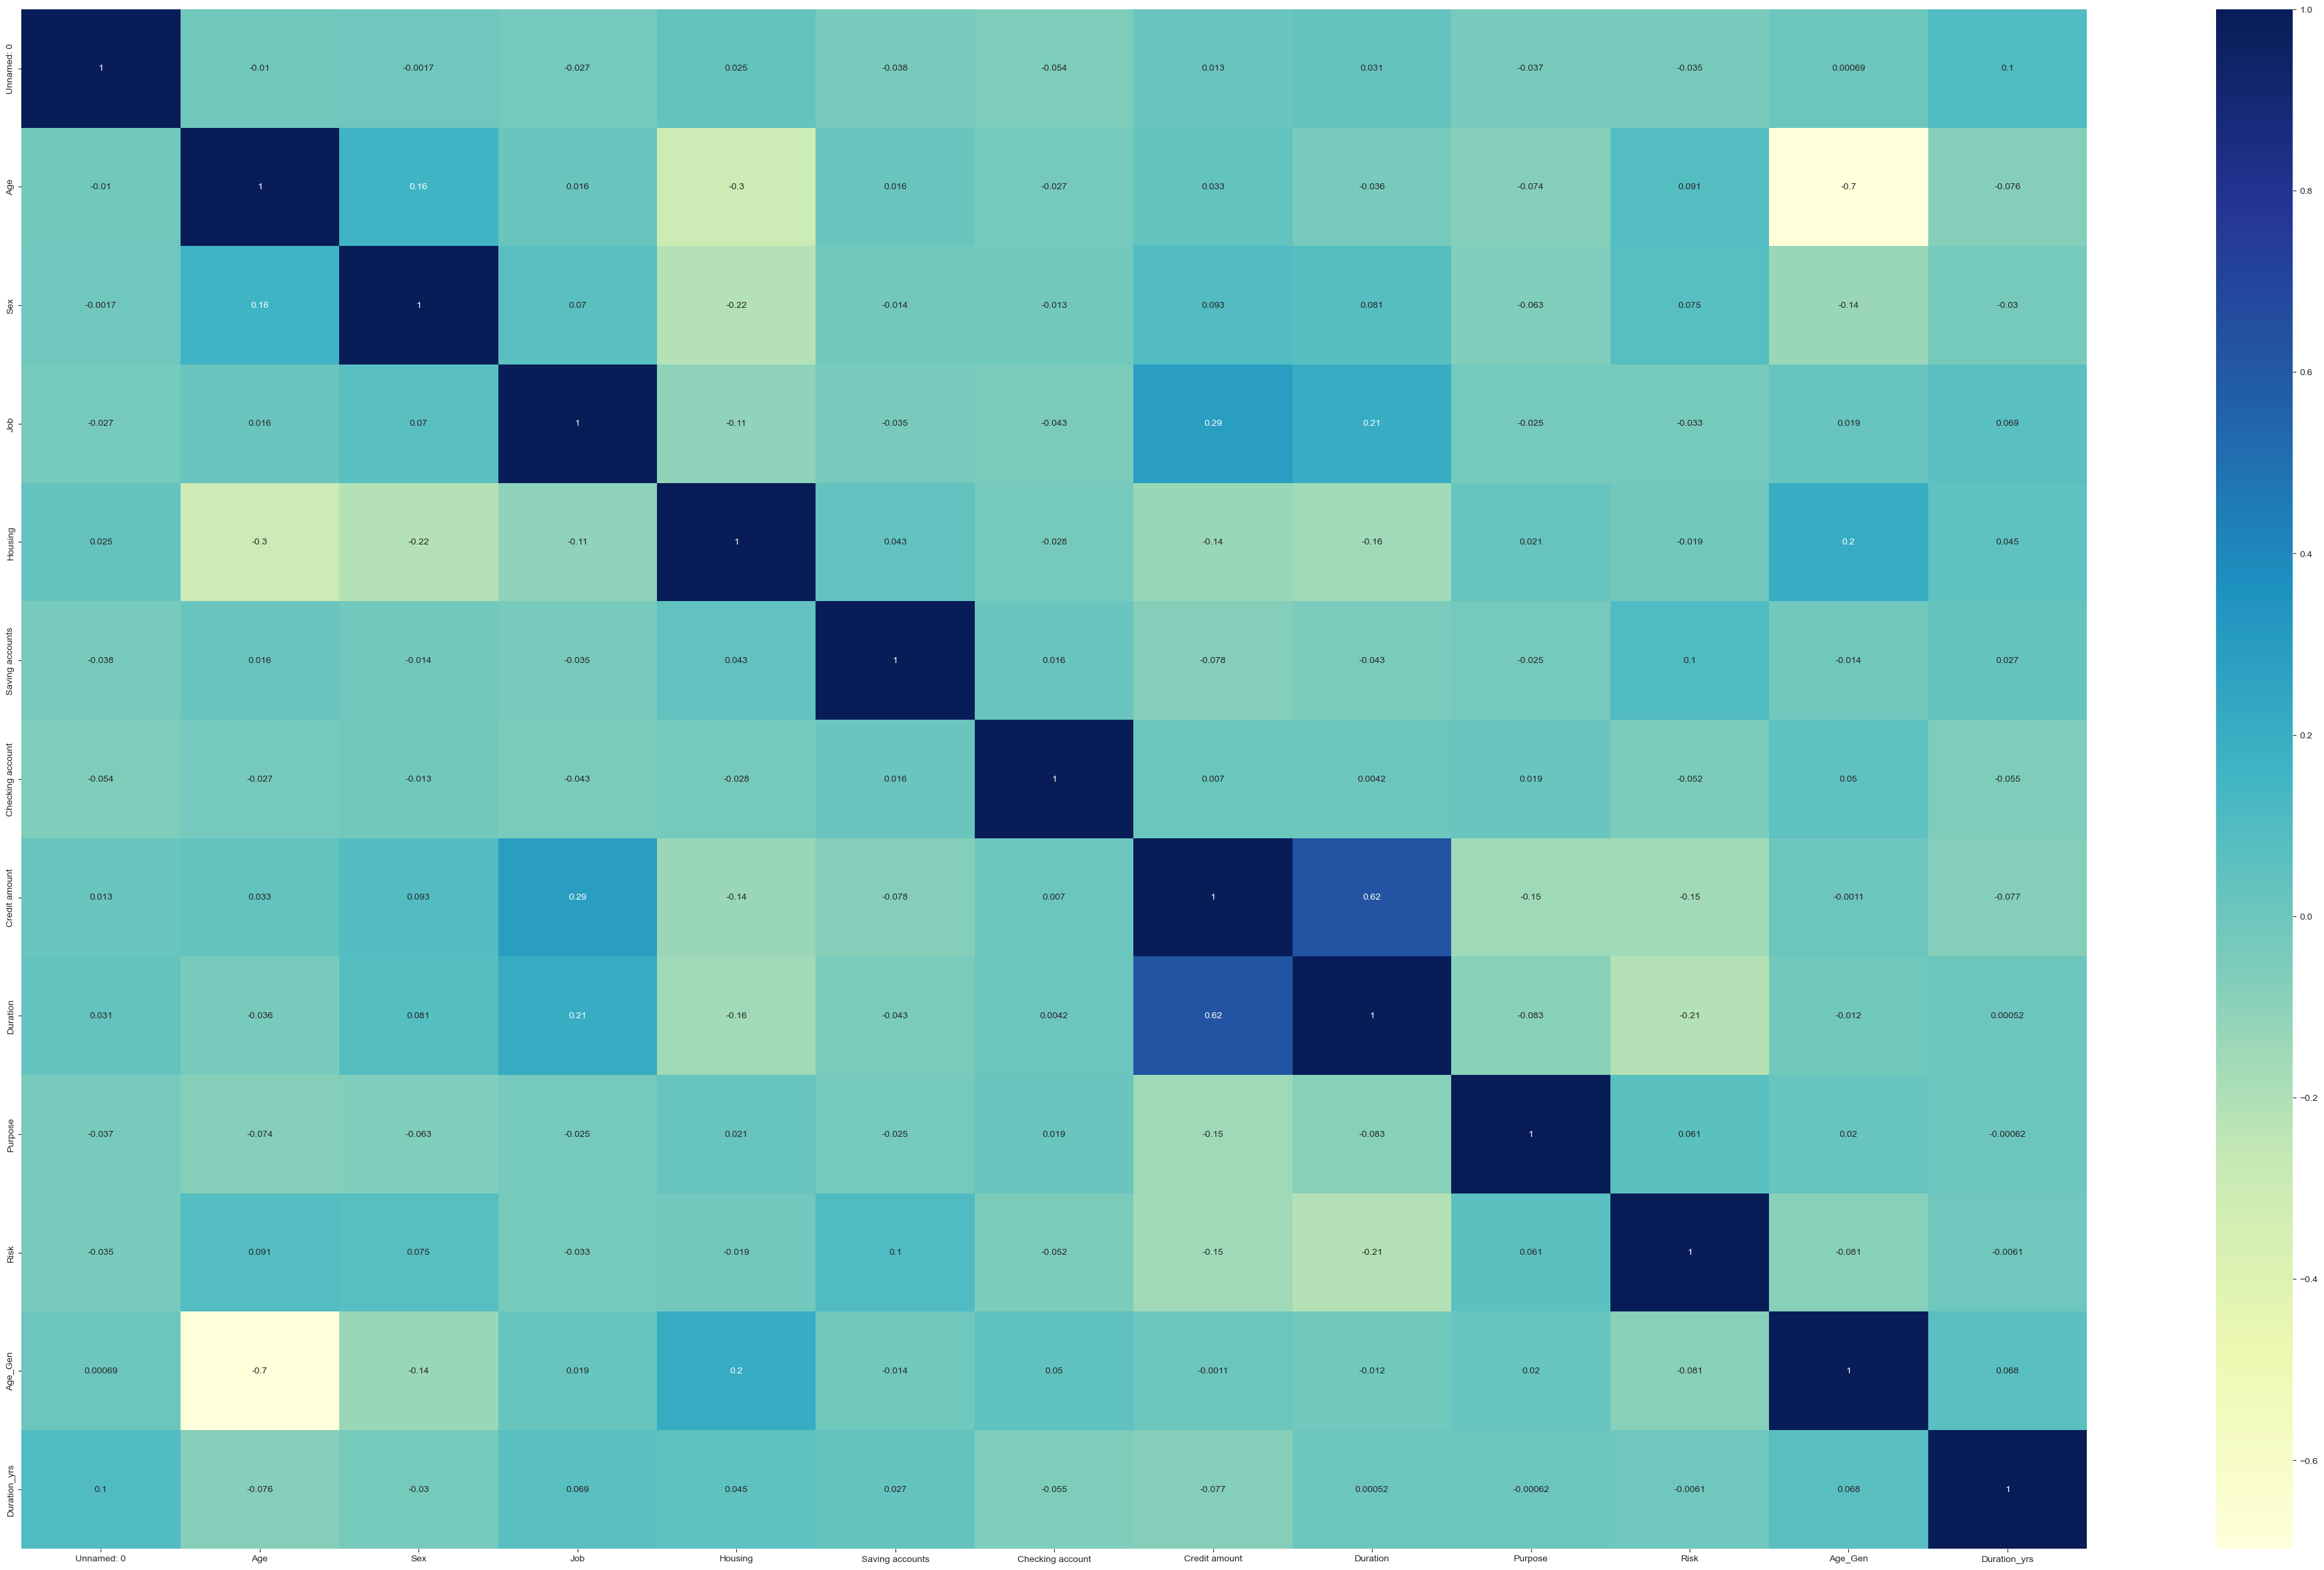

In [57]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

<h3 style="font-size:100%;"><b>Droping Unecessary Column-Unique Idenitifier:</b></h3>

In [58]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [59]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Gen,Duration_yrs
0,67,1,2,1,0,0,1169,6,5,1,3,2
1,22,0,2,1,0,1,5951,48,5,0,2,1
2,49,1,1,1,0,0,2096,12,3,1,0,2
3,45,1,2,0,0,0,7882,42,4,1,1,1
4,53,1,2,0,0,0,4870,24,1,0,0,5


<h3 style="font-size:100%;"><b>Verifying DataFrame Shape After Data Preprocessing:</b></h3>

In [60]:
df.shape

(1000, 12)

<h2 style="font-size:150%;"><b>Splitting the data into train and test data:</b></h2>

In [61]:
# Splitting the dataset into X and y
y= df['Risk']
X = df.drop(['Risk'], axis=1)

In [62]:
# Checking some rows of X
X.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age_Gen,Duration_yrs
0,67,1,2,1,0,0,1169,6,5,3,2
1,22,0,2,1,0,1,5951,48,5,2,1
2,49,1,1,1,0,0,2096,12,3,0,2
3,45,1,2,0,0,0,7882,42,4,1,1
4,53,1,2,0,0,0,4870,24,1,0,5


In [64]:
# Checking some rows of y
y.head(5)

0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int32

In [65]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data
X_scaled = scaler.fit_transform(X)

# If you want to convert it back to a DataFrame with the original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<h2 style="font-size:150%;"><b># Splitting the dataset using train test split:</b></h2>

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=100, test_size=0.20)

In [67]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 675 to 520
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               800 non-null    float64
 1   Sex               800 non-null    float64
 2   Job               800 non-null    float64
 3   Housing           800 non-null    float64
 4   Saving accounts   800 non-null    float64
 5   Checking account  800 non-null    float64
 6   Credit amount     800 non-null    float64
 7   Duration          800 non-null    float64
 8   Purpose           800 non-null    float64
 9   Age_Gen           800 non-null    float64
 10  Duration_yrs      800 non-null    float64
dtypes: float64(11)
memory usage: 75.0 KB


In [68]:
x_train.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age_Gen,Duration_yrs
675,-0.839594,-1.491914,1.677670,1.749535,-0.463409,-0.653831,0.446153,0.754763,1.073263,0.690845,0.375862
358,-0.663689,0.670280,0.146949,-0.133710,-0.463409,-0.653831,-0.884428,-0.738668,1.073263,0.690845,-0.917983
159,-0.135974,0.670280,-1.383771,-0.133710,-0.463409,-0.653831,-0.486742,-1.236478,1.073263,0.690845,-0.917983
533,-0.839594,0.670280,0.146949,-0.133710,0.778975,-0.653831,-0.694800,0.256953,1.073263,0.690845,1.022784
678,2.502599,0.670280,-1.383771,1.749535,-0.463409,-0.653831,-0.314483,0.256953,1.073263,-1.849026,1.022784


In [69]:
x_test.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age_Gen,Duration_yrs
249,-1.191404,-1.491914,0.146949,1.749535,-0.463409,-0.653831,-1.006002,-0.240857,1.073263,0.690845,1.022784
353,-0.663689,0.670280,0.146949,1.749535,-0.463409,-0.653831,1.037719,-0.738668,1.073263,0.690845,-0.917983
537,0.127883,-1.491914,0.146949,-0.133710,-0.463409,1.001437,0.120774,-0.240857,0.567484,-0.579091,1.022784
424,-0.927547,-1.491914,0.146949,-0.133710,-0.463409,1.001437,-0.180503,-0.738668,0.567484,0.690845,-0.917983
564,0.127883,0.670280,1.677670,-0.133710,-0.463409,1.001437,0.510661,0.256953,-1.455632,-0.579091,1.022784


<h2 style="font-size:100%;"><b>Adding Intercept to Training Features for Logistic Regression:</b></h2>

In [70]:
x_train=sm.add_constant(x_train)
x_train.head()

,const,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age_Gen,Duration_yrs
675,1.0,-0.839594,-1.491914,1.677670,1.749535,-0.463409,-0.653831,0.446153,0.754763,1.073263,0.690845,0.375862
358,1.0,-0.663689,0.670280,0.146949,-0.133710,-0.463409,-0.653831,-0.884428,-0.738668,1.073263,0.690845,-0.917983
159,1.0,-0.135974,0.670280,-1.383771,-0.133710,-0.463409,-0.653831,-0.486742,-1.236478,1.073263,0.690845,-0.917983
533,1.0,-0.839594,0.670280,0.146949,-0.133710,0.778975,-0.653831,-0.694800,0.256953,1.073263,0.690845,1.022784
678,1.0,2.502599,0.670280,-1.383771,1.749535,-0.463409,-0.653831,-0.314483,0.256953,1.073263,-1.849026,1.022784


<h2 style="font-size:100%;"><b>Fitting Logistic Regression Model and Summarizing Results:</b></h2>

In [71]:
from sklearn.linear_model import LogisticRegression
logistic=sm.Logit(y_train,x_train).fit()
print(logistic.summary())

Optimization terminated successfully.
         Current function value: 0.579279
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                 0.05815
Time:                        16:24:53   Log-Likelihood:                -463.42
converged:                       True   LL-Null:                       -492.03
Covariance Type:            nonrobust   LLR p-value:                 3.031e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8933      0.082     10.925      0.000       0.733       1.054
Age        

<h2 style="font-size:100%;"><b>Adding Intercept to Test Features for Logistic Regression:</b></h2>

In [72]:
x_test=sm.add_constant(x_test)
x_test.head()

,const,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age_Gen,Duration_yrs
249,1.0,-1.191404,-1.491914,0.146949,1.749535,-0.463409,-0.653831,-1.006002,-0.240857,1.073263,0.690845,1.022784
353,1.0,-0.663689,0.670280,0.146949,1.749535,-0.463409,-0.653831,1.037719,-0.738668,1.073263,0.690845,-0.917983
537,1.0,0.127883,-1.491914,0.146949,-0.133710,-0.463409,1.001437,0.120774,-0.240857,0.567484,-0.579091,1.022784
424,1.0,-0.927547,-1.491914,0.146949,-0.133710,-0.463409,1.001437,-0.180503,-0.738668,0.567484,0.690845,-0.917983
564,1.0,0.127883,0.670280,1.677670,-0.133710,-0.463409,1.001437,0.510661,0.256953,-1.455632,-0.579091,1.022784


<h2 style="font-size:100%;"><b>Predicted Probabilities using Logistic Regression Model:</b></h2>

In [73]:
y_pred_pro=logistic.predict(x_test)
y_pred_pro.head()

249    0.680199
353    0.769519
537    0.679290
424    0.696601
564    0.639125
dtype: float64

<h2 style="font-size:100%;"><b>Predicting Binary Classes based on Threshold:</b></h2>

In [74]:
y_pred=['0' if x < 0.5 else '1' for x in y_pred_pro]

<h2 style="font-size:100%;"><b>Converting Predicted Binary classes to Float32 and Displaying First 5 Elements:</b></h2>

In [75]:
y_pred=np.array(y_pred,dtype=np.float32)
y_pred[0:5]

array([1., 1., 1., 1., 1.], dtype=float32)

<h3 style="font-size:150%;"><b>Utilizing Scikit-Learn for Classification Performance Metrics:</b></h3>

<h2 style="font-size:100%;"><b>Importing Libraries for Classification Performance Metrics:</b></h2>

In [76]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap

<h2 style="font-size:120%;"><b>Developing User-Defined Functions for Classification Performance Metrics Retrieval:</b></h2>

<h2 style="font-size:100%;"><b>User-Defined Function to generate a classification report:</b></h2>

In [77]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Kappa Value:</b></h2>

In [78]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Confusion Matrix:</b></h2>

In [79]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20) 
    plt.show()

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Roc_Curve:</b></h2>

In [80]:
def plot_roc(model):
    fpr, tpr, _  = roc_curve(y_test, y_pred_pro)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve for term_churn Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_pro),4)))
    plt.grid(True)

<h2 style="font-size:100%;"><b>user-defined function to generate an updated scorecard of all metrics:</b></h2>

In [81]:
score_card=pd.DataFrame(columns=['Model','Auc Score','Precision Score','Recall Score','Accuracy Score',
                                 'Kappa Score','f1-score'])
def update_score_card(model_name):
    global score_card
    score_card=score_card._append({'Model':model_name,
                                  'Auc Score':roc_auc_score(y_test,y_pred_pro),
                                  'Precision Score':metrics.precision_score(y_test,y_pred),
                                  'Recall Score':metrics.recall_score(y_test,y_pred),
                                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred),
                                  'Kappa Score':cohen_kappa_score(y_test,y_pred),
                                  'f1-score':metrics.f1_score(y_test,y_pred)},ignore_index=True)
    return(score_card)

<h2 style="font-size:100%;"><b>Confusion Matrix for Logistic Regression:</b></h2>

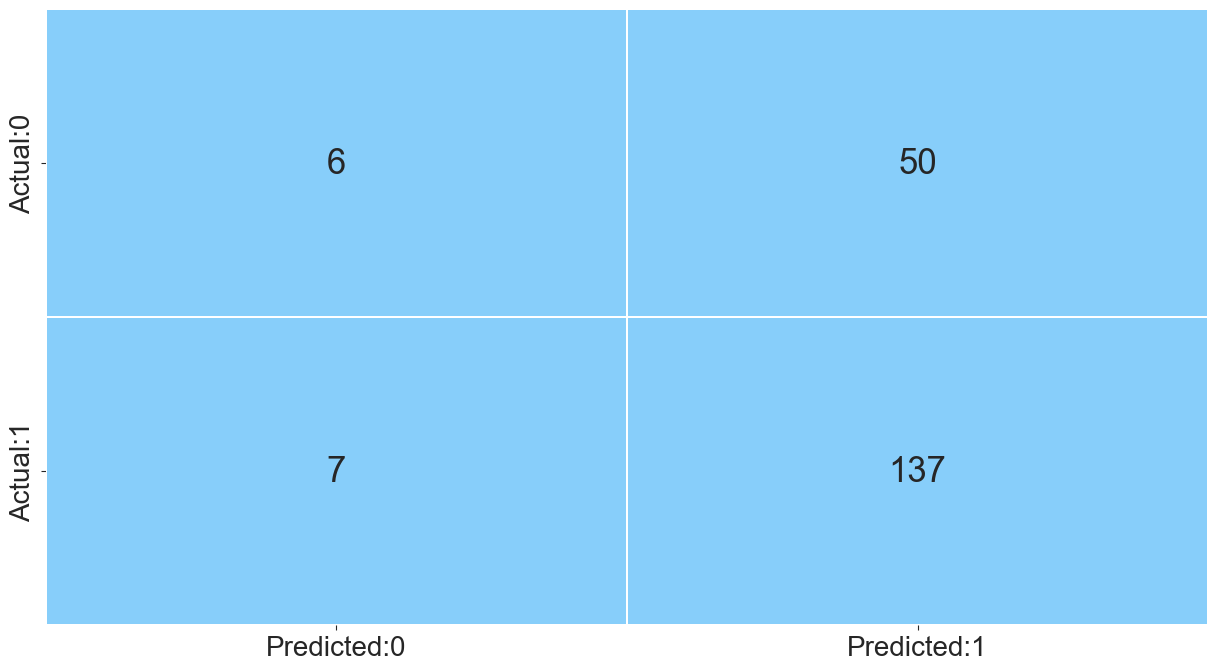

In [82]:
plot_confusion_matrix(logistic)

<h2 style="font-size:100%;"><b>Displaying Test Report for Logistic Regression Model:</b></h2>

In [83]:
test_report=get_test_report(logistic)

In [84]:
print(test_report)

              precision    recall  f1-score   support

           0       0.46      0.11      0.17        56
           1       0.73      0.95      0.83       144

    accuracy                           0.71       200
   macro avg       0.60      0.53      0.50       200
weighted avg       0.66      0.71      0.64       200



<h2 style="font-size:100%;"><b>Calculating Kappa Score for Logistic Regression:</b></h2>

In [85]:
kappa_value=kappa_score(logistic)
print(kappa_value)

0.07647440051847054


<h2 style="font-size:100%;"><b>ROC Curve for Logistic Regression Model:</b></h2>

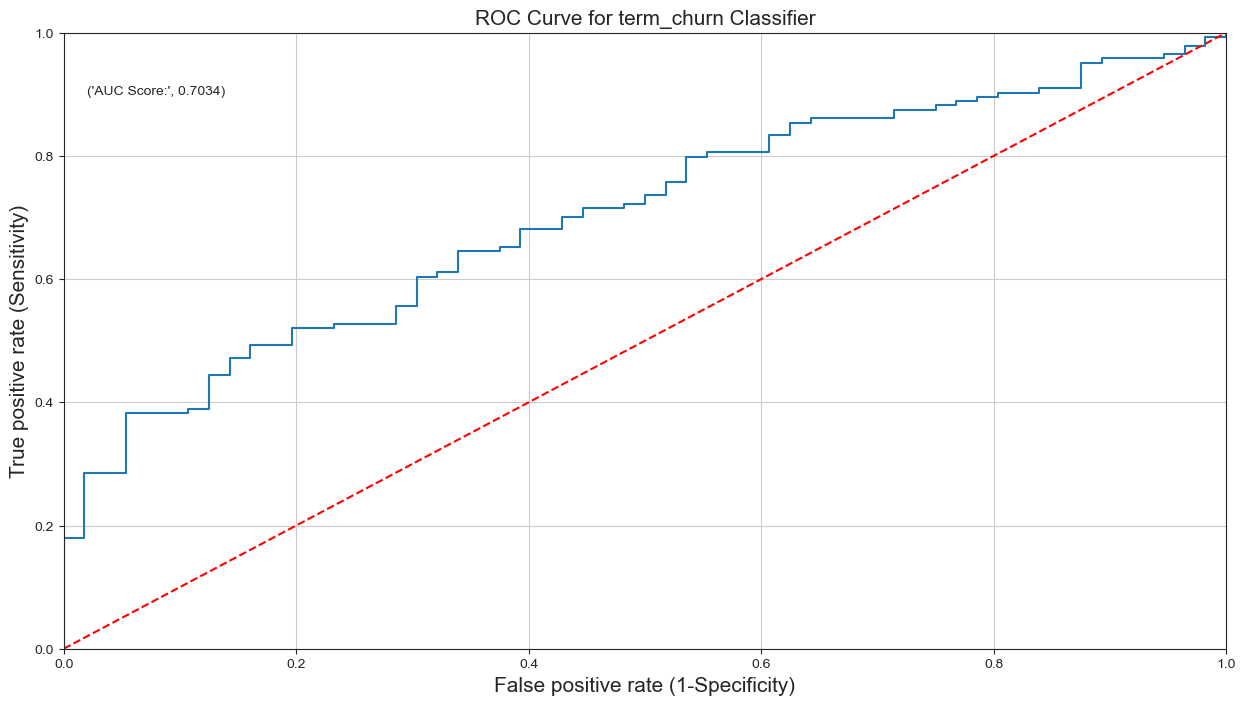

In [86]:
plot_roc(logistic)

<h2 style="font-size:100%;"><b>Generating Updated Score Card for Logistic Regression Model:</b></h2>

In [87]:
update_score_card(model_name='Logistic Regression')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.703373,0.73262,0.951389,0.715,0.076474,0.827795


<h3 style="font-size:150%;"><b>Training Logistic Regression with Stochastic Gradient Descent(Logistic_with_SGD):</b></h3>

In [88]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(loss='log_loss',random_state=10)
log_with_SGD=SGD.fit(x_train,y_train)

<h2 style="font-size:100%;"><b>Obtaining Predicted Probabilities from Logistic Regression with SGD:</b></h2>

In [89]:
y_pred_pro=log_with_SGD.predict_proba(x_test)[:,1]
y_pred_pro

array([0.45954233, 0.78332112, 0.79159842, 0.4318075 , 0.97623806,
       0.58477844, 0.40770739, 0.86549306, 0.88187011, 0.94416967,
       0.31157232, 0.75240527, 0.43479759, 0.92540024, 0.49350746,
       0.92940954, 0.81923949, 0.76246538, 0.82561478, 0.84837235,
       0.96289113, 0.87417293, 0.79215766, 0.57459734, 0.50513015,
       0.72025733, 0.94063069, 0.85272675, 0.4411817 , 0.98909153,
       0.92086976, 0.76675901, 0.46461242, 0.94192153, 0.75023956,
       0.88712751, 0.40094846, 0.90558178, 0.95834318, 0.77185495,
       0.28515788, 0.2904348 , 0.28205669, 0.73767711, 0.80145637,
       0.89624382, 0.88701582, 0.77022074, 0.92556306, 0.34549264,
       0.75311737, 0.9779332 , 0.99478188, 0.7653964 , 0.66738962,
       0.92571096, 0.56110192, 0.88105031, 0.79159929, 0.46383963,
       0.966428  , 0.8888799 , 0.93000276, 0.71933708, 0.84011903,
       0.9369499 , 0.98248544, 0.68404265, 0.81561421, 0.82731549,
       0.88085311, 0.43451656, 0.31085627, 0.55637994, 0.81094

<h2 style="font-size:100%;"><b>Predictions using Logistic Regression with SGD:</b></h2>

In [90]:
y_pred=log_with_SGD.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

<h2 style="font-size:150%;"><b>Performance Metrics for SGD Logistic Regression:</b></h2>

<h2 style="font-size:100%;"><b>Confusion Matrix for SGD Logistic Regression:</b></h2>

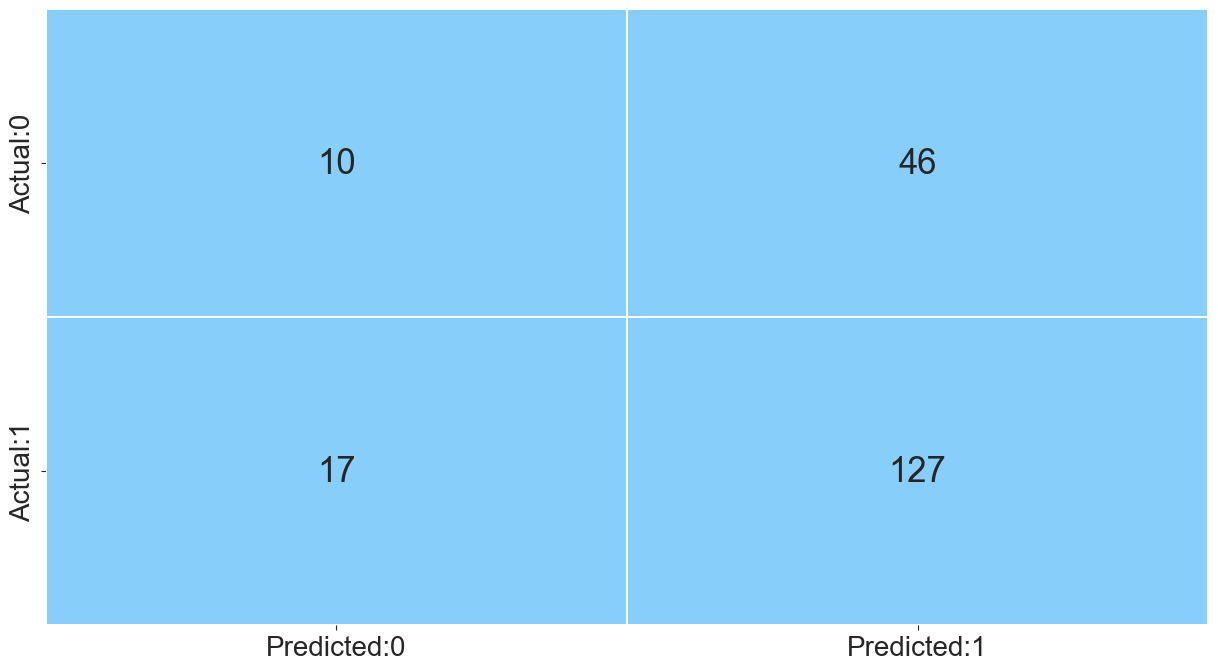

In [92]:
plot_confusion_matrix(log_with_SGD)

<h2 style="font-size:100%;"><b>Generating Test Report for SGD Logistic Regression:</b></h2>

In [ ]:
test_report=get_test_report(log_with_SGD)

In [94]:
print(test_report)

              precision    recall  f1-score   support

           0       0.37      0.18      0.24        56
           1       0.73      0.88      0.80       144

    accuracy                           0.69       200
   macro avg       0.55      0.53      0.52       200
weighted avg       0.63      0.69      0.64       200



<h2 style="font-size:100%;"><b>Calculating kappa Value for SGD Logistic Regression:</b></h2>

In [95]:
kappa_value=kappa_score(log_with_SGD)
print(kappa_value)

0.07189157336476126


<h2 style="font-size:100%;"><b>ROC Curve for SGD Logistic Regression:</b></h2>

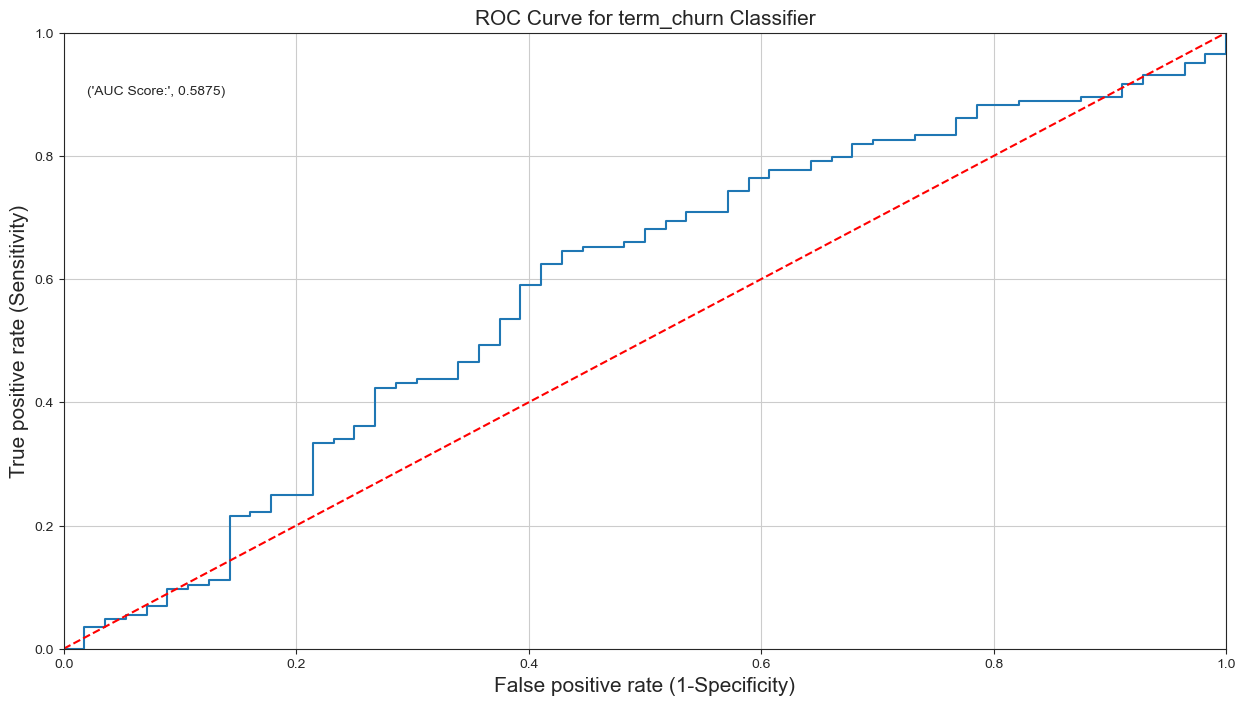

In [96]:
plot_roc(log_with_SGD)

<h2 style="font-size:100%;"><b>Updating Score Card for Logistic Regression with SGD:</b></h2>

In [97]:
update_score_card(model_name='Logistic Regression with SGD')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.703373,0.732620,0.951389,0.715,0.076474,0.827795
1,Logistic Regression with SGD,0.587550,0.734104,0.881944,0.685,0.071892,0.801262


<h2 style="font-size:150%;"><b>Constructing Random Forest Classifier:</b></h2>

<h2 style="font-size:100%;"><b>Importing Libraries for Random Forest Classifier Construction:</b></h2>

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<h2 style="font-size:100%;"><b>Training Random Forest Classifier with 1000 Estimators:</b></h2>

In [99]:
rf_cls=RandomForestClassifier(n_estimators=1000,random_state=10)
rf_cls.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=10)

<h2 style="font-size:100%;"><b>Predictions using Random Forest Classifier:</b></h2>

In [100]:
y_pred=rf_cls.predict(x_test)

<h2 style="font-size:100%;"><b>Metrics for Random Forest Classifier with Optimized Parameters:</b></h2>

<h2 style="font-size:100%;"><b>Confusion Matrix for Random Forest Classifier:</b></h2>

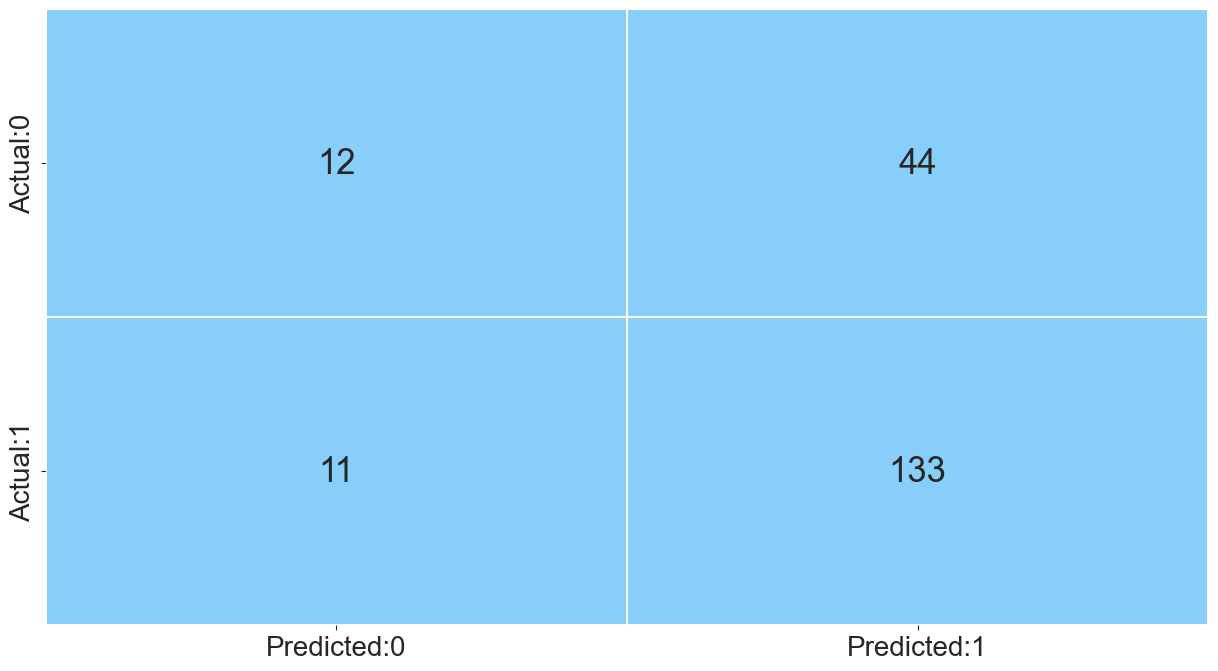

In [101]:
plot_confusion_matrix(rf_cls)

<h2 style="font-size:100%;"><b>Evaluating Test Report for Random Forest Classifier:</b></h2>

In [102]:
test_report=get_test_report(rf_cls)
print(test_report)

              precision    recall  f1-score   support

           0       0.52      0.21      0.30        56
           1       0.75      0.92      0.83       144

    accuracy                           0.72       200
   macro avg       0.64      0.57      0.57       200
weighted avg       0.69      0.72      0.68       200



<h2 style="font-size:100%;"><b>Calculating Kappa Score for Random Forest Classifier:</b></h2>

In [103]:
kappa_value=kappa_score(rf_cls)
print(kappa_value)

0.16817906836055663


<h2 style="font-size:100%;"><b>ROC Curve for Random Forest Classifier:</b></h2>

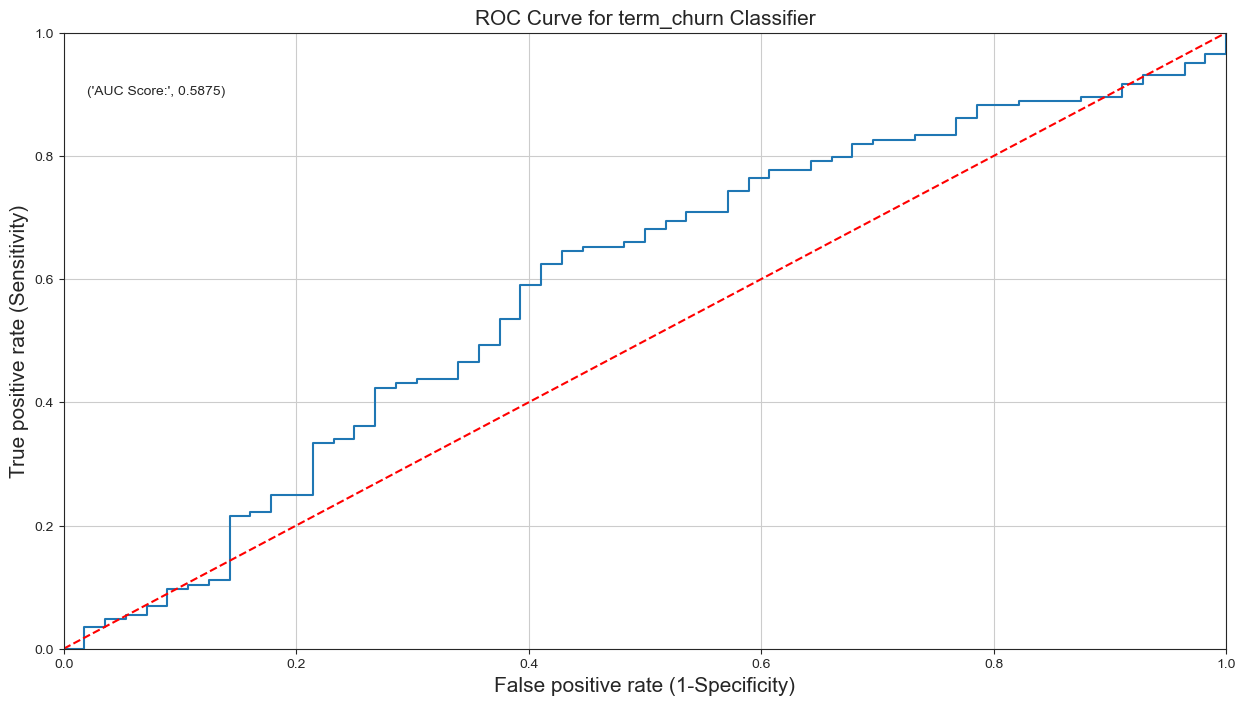

In [104]:
plot_roc(rf_cls)

<h2 style="font-size:100%;"><b>Updating Score Card for Random Forest Classifier:</b></h2>

In [105]:
update_score_card(model_name='Random Forest')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.703373,0.732620,0.951389,0.715,0.076474,0.827795
1,Logistic Regression with SGD,0.587550,0.734104,0.881944,0.685,0.071892,0.801262
2,Random Forest,0.587550,0.751412,0.923611,0.725,0.168179,0.828660


<h2 style="font-size:150%;"><b>Model Building with Random Forest Classifier and Hyperparameter Tuning:</b></h2>

<h2 style="font-size:100%;"><b>Defining Tuning Parameters for Random Forest Classifier:</b></h2>

In [106]:
tuned_parameters = [{
    'n_estimators': [150,200,250],
    'min_samples_split': [15, 25, 30],
    'max_depth': [8, 10, 15],
    'min_samples_leaf': [30,40,50],
    'max_leaf_nodes': [30,40,50]
}]

<h2 style="font-size:100%;"><b>Optimized Parameters for Random Forest Classifier:</b></h2>    

In [107]:
rf_cls_CV=RandomForestClassifier(random_state=10)
grid=GridSearchCV(estimator=rf_cls_CV,param_grid=tuned_parameters,cv=10)
rf_grid=grid.fit(x_train,y_train)
print(rf_grid.best_params_, '\n')

{'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 30, 'min_samples_split': 15, 'n_estimators': 250} 



<h2 style="font-size:100%;"><b>Training Random Forest Classifier with Optimized Parameters:</b></h2>

In [108]:
rf_grid_model=RandomForestClassifier(n_estimators=rf_grid.best_params_.get('n_estimators'),
                                    max_depth=rf_grid.best_params_.get('max_depth'),
                                    max_leaf_nodes=rf_grid.best_params_.get('max_leaf_nodes'),
                                    min_samples_leaf=rf_grid.best_params_.get('min_samples_leaf'),
                                    min_samples_split=rf_grid.best_params_.get('min_samples_split'),
                                    random_state=10)
rf_grid_model=rf_grid_model.fit(x_train,y_train)

<h2 style="font-size:100%;"><b>Generating Predictions using Random Forest Classifier with Optimized Parameters:</b></h2>

In [109]:
y_pred=rf_grid_model.predict(x_test)

<h2 style="font-size:100%;"><b>Confusion Matrix for Random Forest Classifier with Optimized Parameters:</b></h2>

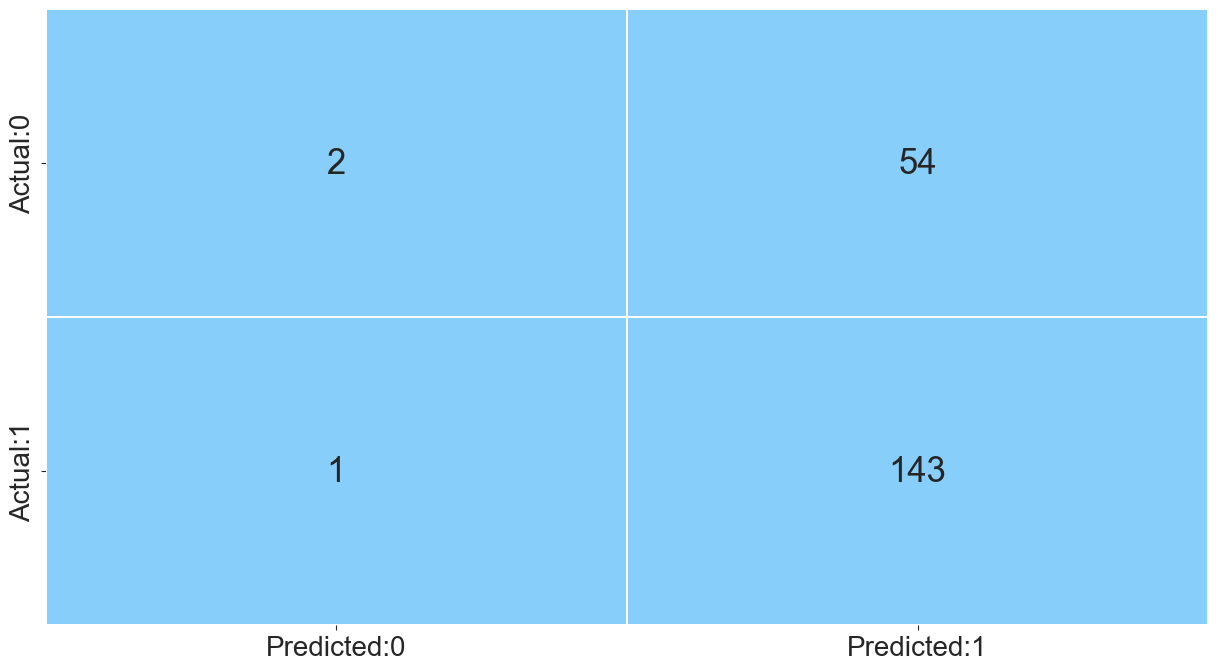

In [110]:
plot_confusion_matrix(rf_grid_model)

<h2 style="font-size:100%;"><b>Evaluating Test Report for Random Forest Classifier with Optimized Parameters:</b></h2>

In [111]:
test_report=get_test_report(rf_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.67      0.04      0.07        56
           1       0.73      0.99      0.84       144

    accuracy                           0.72       200
   macro avg       0.70      0.51      0.45       200
weighted avg       0.71      0.72      0.62       200



<h2 style="font-size:100%;"><b>Calculating Kappa value for Random Forest Classifier with Optimized Parameters:</b></h2>

In [112]:
kappa_value=kappa_score(rf_grid_model)
print(kappa_value)

0.04047452896022319


<h2 style="font-size:100%;"><b>ROC Curve for Random Forest Classifier with Optimized Parameters:</b></h2>

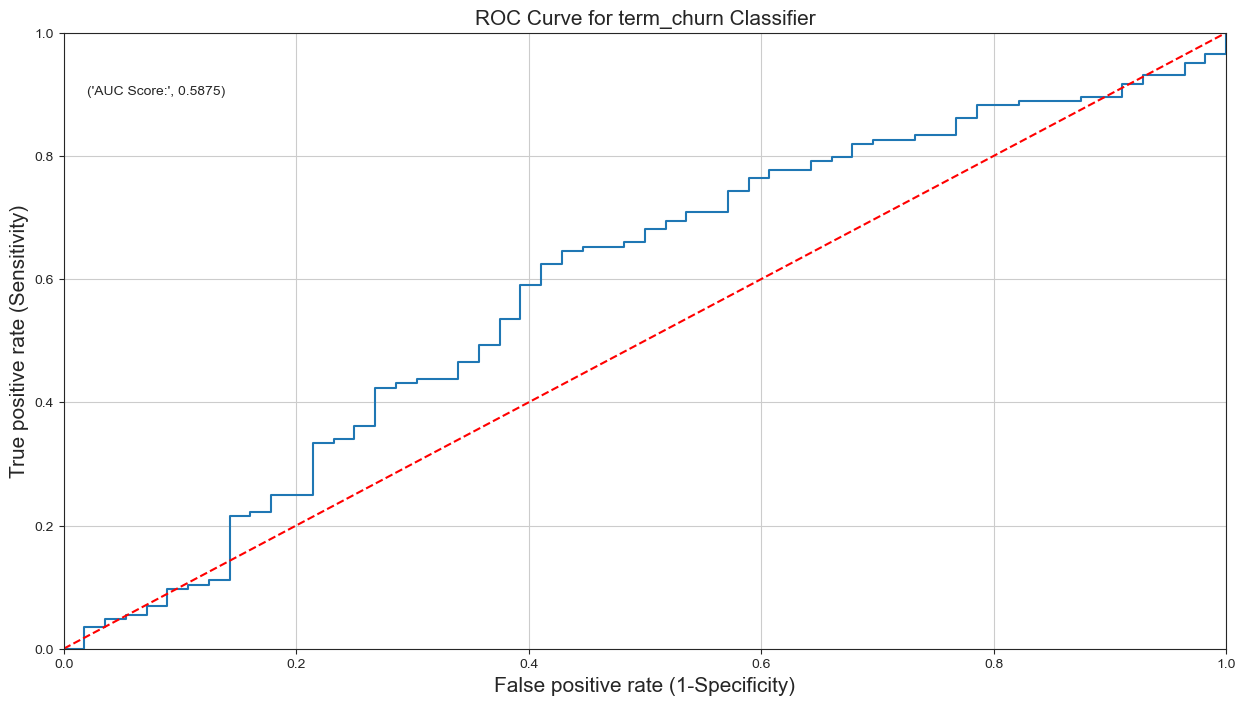

In [113]:
plot_roc(rf_grid_model)

<h2 style="font-size:100%;"><b>Updating Score Card for Random Forest Classifier with Tuned Parameters:</b></h2>

In [114]:
update_score_card(model_name='Random Forest with Tunned Parametres')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.703373,0.732620,0.951389,0.715,0.076474,0.827795
1,Logistic Regression with SGD,0.587550,0.734104,0.881944,0.685,0.071892,0.801262
2,Random Forest,0.587550,0.751412,0.923611,0.725,0.168179,0.828660
3,Random Forest with Tunned Parametres,0.587550,0.725888,0.993056,0.725,0.040475,0.838710


<h2 style="font-size:100%;"><b>Exporting  Predictions to excel:</b></h2>

In [116]:
import pandas as pd

# Assuming rf_cls contains the prediction results
# Creating a DataFrame with automated serial numbers and fraud class for credit amount
predict = pd.DataFrame({
    'Serial Number': range(1, len(y_pred) + 1),  # Automated row numbers
    'Credit_Risk_Label': y_pred,  # Predictions for Risk detection
    'Risk_of_Credit': ['Yes' if pred == 1 else 'No' for pred in y_pred]  # Yes for Risk (1), No for no Risk (0)
})

# Exporting to Excel with the specified path
output_path = r"C:\Users\sm983\Desktop\Imarticus full clear\Github\credit_risk_analysis\Test_Risk_Detection\Credit_Risk_Analysis.xlsx"
predict.to_excel(output_path, index=False)

print("Exported successfully to:", output_path)


Exported successfully to: C:\Users\sm983\Desktop\Imarticus full clear\Github\credit_risk_analysis\Test_Risk_Detection\Credit_Risk_Analysis.xlsx


## Conclusion
The project results indicate that all models performed reasonably well, with high precision and recall scores, indicating the ability to correctly identify both high-risk and low-risk cases. The Logistic Regression model achieved the best balance between recall and precision, with a high recall score of 95.1% and an F1-Score of 82.8%. The Random Forest model, particularly after tuning, also demonstrated strong performance, with a high recall of 99.3% and an F1-Score of 83.9%.

While the models provided solid predictive capabilities, further improvements could be made by enhancing feature engineering, optimizing hyperparameters, and experimenting with other algorithms. This project effectively highlights the utility of machine learning in credit risk assessment, offering a reliable approach for financial institutions to make informed lending decisions.